# AulaP7

- Polinómios de Hermite 
- Splines Cúbicos

***
## Polinómios de Hermite

- **Problema: Polinómios osculadores** 

 - Considerem-se os $n+1$ nós de interpolação distintos $x_0,\dots,x_n$, e para $i=0,\dots,n$  seja $m_i\in \mathbb{N}$. 

 - Dada uma função $f\in C^m([a,b])$ com $m=\max_{0\leq i\leq n} m_i,$  como construir um polinómio $P$ de menor grau possível que satisfaça as condições:
$$\frac{{\rm d}^k P(x_i)}{{\rm d} x^k}=\frac{{\rm d}^k f(x_i)}{{\rm d} x^k},$$ para $i=0,\dots,n$ e $k=0,1,\dots,m_i$.

- Designam-se por **Polínomios de Hermite** aos polinómios  osculadores $H_{2n+1}$ que satisfazem $\forall i=0,\dots,n$:
 $$f(x_i)=H(x_i)$$
 $$f'(x_i)=H'(x_i).$$

### Teorema de Existência e unicidade:

- Considerem-se os $n+1$ nós de interpolação distintos $x_0,\dots,x_n$, bem como uma função $f\in C^1([a,b])$, então existe um e um só polinómio de grau inferior ou igual a $2n+1$ que interpola $f$ e $f'$ (ver condições anteriores).

***
### Polinómio de Hermite: (com Lagrange)

- Usando Lagrange:

$$ H_{2n+1}(x)=\sum_{j=0}^{n}f(x_j)H_{n,j}(x)+\sum_{j=0}^{n}f'(x_j) \widehat{H}_{n,j}(x)$$
onde 
$$ H_{n,j}(x)=\left[1-2(x-x_j)L'_{n,j}(x_j)\right]L^2_{n,j}(x) \quad \text{e}$$

$$ \widehat{H}_{n,j}(x)=(x-x_j)L^2_{n,j}(x) $$

- Onde os valores das derivadas das funções de Lagrange nos nós de interpolação podem ser dados por: (Ver Quarteroni, Sacco, Saleri: *"Numerical Mathematics"*, pag. 342)
 $$L'_{n,j}(x_j)=\sum_{k=0,j\neq k}^n \frac{1}{x_j-x_k}$$ 

### Fórmula do Erro:
 
 $$f(x)-H_{2n+1}(x)= \frac{(x-x_0)^2\cdots(x-x_n)^2}{(2n+2)!}f^{(2n+2)}(\xi(x)),\quad \xi(x)\in[a,b]$$

***
### Uma implementação possível (com classes)
 - PLagrange é um objecto que tem como membros:
  - As função base de Lagrange Li avaliada em x (variável)
  - A avaliação da derivada de Li em xi (DxLixi)
  - A avaliação da derivada de Li em x  DxLi (variável) 
  - O polinómio de Lagrange (LagrangeFunction) avaliado em x (variável)
  - A derivada do polinómio de Lagrange (LagrangeFunction) avaliado em x (variável)

In [1]:
import numpy as np

class PLagrange:
    """ see this docstring with 
        >>>help(PLagrange):
        Lagrange Polynomial class: 
        here should be a description of the class
        eventually with howto examples"""
    
    def __init__(self,data_x,data_y):
        """Initialize the class"""
        self.x=data_x
        self.y=data_y
        self.N=len(data_x)
        assert len(self.x) != 0 and (len(self.x) == len(self.y)),\
        'x and y cannot be empty and must have the same length'

    
    def LInfo(self):
        """Just info on the PLagrange Object"""
        print('x=',self.x)
        print('y=',self.y)
        print('Lagrange Polynomial degree=',self.N -1)
    
    def Li(self,i,varx):
        """Lagrange basis Functions"""
        lival=1.0
        
        for j in range(0,self.N):
            if j!=i:
                lival*=(varx-self.x[j])/(self.x[i]-self.x[j]) #Basis Function
        return lival
    
    def DxLixi(self,i):
        """Lagrange basis Functions derivatives evaluated at xi"""
        vals=0.0
        for k in range(0,self.N): 
            if k!=i:
                vals+=1.0/(self.x[i]-self.x[k])
        
        return vals
    
    def DxLi(self,i,varx):
        """Lagrange basis Functions derivatives evaluated at varx"""
        dxlival=0.0
        
        for k in range(0,self.N):
            prodval=1.0
            if k!=i:
                for m in range(0,self.N):
                    if m!=k and m!=i:
                        prodval*=(varx-self.x[m])/(self.x[i]-self.x[m])
                dxlival+=prodval/(self.x[i]-self.x[k])
        
        return dxlival
            
        
    def LagrangeFunction(self,varx):
        PolLagrange=0.0
        for i in range(0,self.N):
            PolLagrange+=self.Li(i,varx)*self.y[i] # Lagrange Polynomial
        
        return PolLagrange
    
    def DxLagrangeFunction(self,varx):
        DxPolLagrange=0.0
        for i in range(0,self.N):
            DxPolLagrange+=self.DxLi(i,varx)*self.y[i] # Derivative Lagrange Polynomial
        
        return DxPolLagrange

### Teste à classe PLagrange

x= [ 0.   0.6  1.3]
y= [ 0.          1.52464247  3.95355819]
Lagrange Polynomial degree= 2
[ 0.   0.6  1.3]


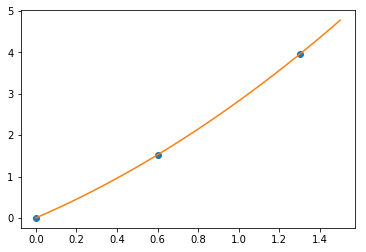

In [2]:
x=np.array([0,0.6,1.3])
y=np.sin(x)+x**2+x
P2L=PLagrange(x,y)
P2L.LInfo()
print(P2L.x)
xx=np.linspace(0, 1.5, 50)
yy=P2L.LagrangeFunction(xx)
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
plt.plot(xx,yy,'-')
plt.show()

### Classe para Hermite

In [3]:
class PHermite(PLagrange):
    """The PHermite class extends the PLagrange class"""

    def __init__(self,data_x,data_y,data_dy):
        PLagrange.__init__(self,data_x,data_y)
        self.dy=data_dy
        assert len(self.dy) != 0 and (len(self.dy) == len(self.y)),\
        'dy and y cannot be empty and must have the same length'

    def HInfo(self):
        self.LInfo()
        print('dy=',self.dy)
        print('Hermite Polynomial degree=', 2*(self.N-1)+1)

    
    def HermiteFunction(self,varx):
        PolHermite=0.0
        for i in range(0,self.N):
            PolHermite+=self.y[i]*(1.0-2.0*(varx-self.x[i])*self.DxLixi(i))*self.Li(i,varx)**2
            PolHermite+=self.dy[i]*(varx-self.x[i])*self.Li(i,varx)**2 # Polinómio de Lagrange
        
        return PolHermite
    
    def DxHermiteFunction(self,varx):
        DxPolHermite=0.0
        for i in range(0,self.N):
            DxPolHermite+=-self.y[i]*2.0*self.DxLixi(i)*self.Li(i,varx)**2
            DxPolHermite+=2.0*self.y[i]*(1.0-2.0*\
                                         (varx-self.x[i])*self.DxLixi(i))*self.Li(i,varx)*self.DxLi(i,varx)
            DxPolHermite+=self.dy[i]*self.Li(i,varx)**2
            DxPolHermite+=2.0*self.dy[i]*(varx-self.x[i])*self.Li(i,varx)*self.DxLi(i,varx) 
        
        return DxPolHermite

 ***

### Exemplo:
- Verificar a implementação anterior com  $$f(x)=\sin(4\pi x)$$ em 4 pontos igualmente espaçados em $[0,1]$ (Validação com exemplo da literatura (Quarteroni))

In [4]:
A,B=0.1,0.4
N=21
x = np.linspace(A,B,N)
y = np.cos(x)*x-2*x**2+3*x-1
dy= np.cos(x)-x*np.sin(x)-4*x+3

In [5]:
P=PHermite(x,y,dy)
P.HInfo()

x= [ 0.1    0.115  0.13   0.145  0.16   0.175  0.19   0.205  0.22   0.235
  0.25   0.265  0.28   0.295  0.31   0.325  0.34   0.355  0.37   0.385  0.4  ]
y= [-0.62049958 -0.5672096  -0.51489695 -0.46357164 -0.41324363 -0.36392286
 -0.3156192  -0.2683425  -0.22210256 -0.17690913 -0.13277189 -0.08970049
 -0.04770448 -0.00679337  0.03302341  0.07173649  0.10933659  0.1458145
  0.18116112  0.2153674   0.2484244 ]
Lagrange Polynomial degree= 20
dy= [ 3.58502082  3.52019892  3.45470946  3.3885545   3.32173637  3.25425761
  3.18612105  3.11732972  3.04788693  2.97779624  2.90706143  2.83568654
  2.76367586  2.69103389  2.61776539  2.54387537  2.46936905  2.39425191
  2.31852964  2.24220817  2.16529366]
Hermite Polynomial degree= 41


In [6]:
## Avaliação da interpolação em pontos dados: *zona de testes*
print(P.LagrangeFunction(0.75))
print(P.HermiteFunction(0.75))
print(np.sin(4.0*np.pi*0.75))
### Extras
print(P.DxLagrangeFunction(0.5))
print(P.DxHermiteFunction(0.5))
print(P.DxHermiteFunction(x))
print(P.DxLi(0,x))

22.1030273438
-1.3288330111e+20
3.67394039744e-16
1.6377474647
-1592561202.22
[ 3.58502082  3.52019892  3.45470946  3.3885545   3.32173637  3.25425761
  3.18612105  3.11732972  3.04788693  2.97779624  2.90706143  2.83568654
  2.76367586  2.69103389  2.61776539  2.54387537  2.46936905  2.39425191
  2.31852964  2.24220817  2.16529366]
[ -2.39849310e+02  -3.33333333e+00   1.75438596e-01  -1.94931774e-02
   3.43997248e-03  -8.59993120e-04   2.86664373e-04  -1.22856160e-04
   6.61533169e-05  -4.41022113e-05   3.60836274e-05  -3.60836274e-05
   4.41022113e-05  -6.61533169e-05   1.22856160e-04  -2.86664373e-04
   8.59993120e-04  -3.43997248e-03   1.94931774e-02  -1.75438596e-01
   3.33333333e+00]


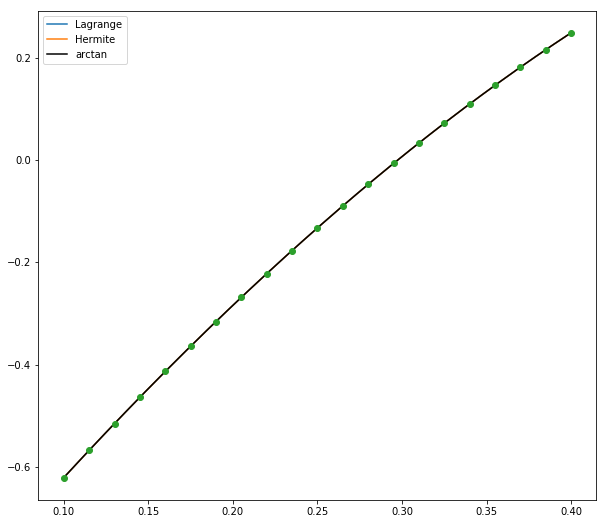

In [7]:
import matplotlib.pyplot as plt
xx=np.linspace(A,B,200)
ly=P.LagrangeFunction(xx)
dly=P.DxLagrangeFunction(xx)
hy=P.HermiteFunction(xx)
dhy=P.DxHermiteFunction(xx)
sy=np.cos(xx)*xx-2*xx**2+3*xx-1
dsy=np.cos(xx)-xx*np.sin(xx)-4*xx+3
plt.figure(figsize=(10,9))
plt.plot(xx,ly,'-',label='Lagrange')
plt.plot(xx,hy,'-',label='Hermite')
plt.plot(xx,sy,'-', color='k',label='arctan')
plt.plot(x,y,'o')
plt.legend()
plt.show()
plt.clf()


### Representação da derivada.  
-  **Hermite vs. Lagrange vs. Exacta** 

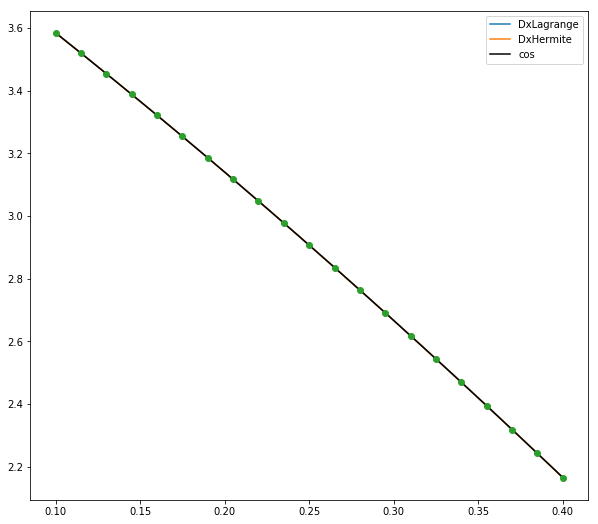

In [8]:
plt.figure(figsize=(10,9))
plt.plot(xx,dly,'-',label='DxLagrange')
plt.plot(xx,dhy,'-',label='DxHermite')
plt.plot(xx,dsy,'-', color='k',label='cos')
plt.plot(x,dy,'o')
plt.legend()
plt.show()
plt.clf()



***
### Exercício T.P.C.: Implementar os Polínomios de Hermite através de Newton / Diferenças Divididas

### Exercício: 

- Represente gráficamente os polinómios interpoladores de Lagrange $(x,f(x))$ e Hermite $(x,f(x),f'(x))$ para os dados na tabela seguinte:

$$
\begin{array}{c|c|c}
x & f(x) & f'(x)\\
0.1 & -0.62049958 & 3.58502082\\
0.2 & -0.28398668 & 3.14033271 \\
0.3 & 0.00660095  & 2.66668043 \\
0.4 & 0.24842440  & 2.16529366 \\
\end{array}
$$

***

## Splines Cúbicos

- Veja-se o exemplo seguinte com splines lineares.

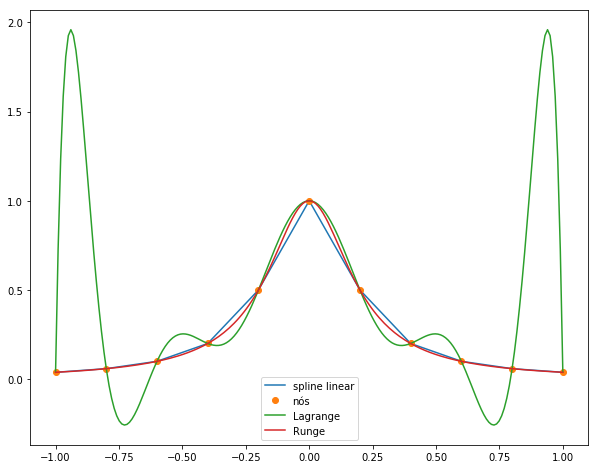

In [21]:
x=np.linspace(-1,1,11)
y=1./(1+25*x**2)

xx=np.linspace(-1.,1,200)
yy=1./(1+25*xx**2)

yl=PLagrange(x,y).LagrangeFunction(xx)
plt.figure(figsize=(10,8))
plt.plot(x,y,'-',label='spline linear')
plt.plot(x,y,'o',label='nós')
plt.plot(xx,yl,'-',label='Lagrange')
plt.plot(xx,yy,'-',label='Runge')
plt.legend()
plt.show()
plt.clf()

### **Motivação**:  aproximar a função por um polinómio $P_{i}(x)$ em cada troço $[x_i,x_{i+1}]$.

- Evita-se o efeito de Runge.
-  Com polínomios de grau 3  por troço, podemos interpolar os nós em $f(x_i),\, f(x_{i+1})$ e forçar a continuidade das derivadas dos polinómios interpoladores por cada troço  em  $x_i$, até à segunda ordem.
   
-  É possível (e necessário) a imposição de condições de fronteira nas primeiras ou segundas derivadas.  
-  Não há regularidade nas derivadas de ordem superior a 2 (nos nós de interpolação).
    

### Definição:

- Dada uma função $f$ definida em $[a,b]$ e um conjunto de nós $a=x_0<\dots<x_b=b$, diz-se um spline cúbico $S(x)$ interpolador de $f(x)$  a uma função que satisfaz:

     $S(x)$ é um polínomio cúbico, denotado por $S_j(x)$, em cada troço $[x_i,x_{i+1}],\quad$ $\forall i=0,1,\dots,n-1$.
    
    $S_i(x_i)=f(x_i)\quad$ e $\quad S_i(x_{i+1})=f(x_{i+1}),\quad$ $\forall i=0,1,\dots,n-1$.
    
    $S_{i+1}(x_{i+1})=f(x_{i+1}),\quad$ $\forall i=0,1,\dots,n-2$.
    
    $S'_{i+1}(x_{i+1})=S'_{i}(x_{i+1})\quad$ $\forall i=0,1,\dots,n-2$.
    
    $S''_{i+1}(x_{i+1})=S''_{i}(x_{i+1})\quad$ $\forall i=0,1,\dots,n-2$.
    
juntamente com umas das seguintes condições de fronteira:
    
   $S''(x_0)=S''(x_{n})=0\quad$ (fronteira **natural** ou livre)
   
   $S'(x_0)=f'(x_{0})\quad$ e  $\quad S'(x_n)=f'(x_{n})\quad$  (**condições na derivada**, fronteira **encastrada** *clamped*)

### Existência e unicidade

- Nas condições anteriores é garantida a existência de um spline cúbico **natural**.

- Em cada troço $[x_i,x_{i+1}]$ tem-se 

$$S_i(x)=a_i+b_i(x-x_i)+c_i(x-x_i)^2+d_i(x-x_i)^3\quad\forall i=0,1,\dots,n-1.$$ 




***
### Problema: 

- Como calcular os coeficientes $a_i, b_i, c_i, d_i$?.

 $$h_i=x_{i+1}-x_i\quad i=0,\dots, n-1$$

 $$a_i=f(x_i),\quad i=0,\dots, n$$

 $$b_i=\frac{a_{i+1}-a_i}{h_i}-\frac{h_i}{3}(2 c_i+c_{i+1}),\quad i=0,\dots, n-1$$
 
 $$d_i=\frac{c_{i+1}-c_{i}}{3h_i}, \quad i=0,\dots, n-1$$
 

- **$c_i,\quad  (i=0,\dots, n)$** resulta da resolução de um sistema tridiagonal de $(n+1)\times(n+1):$

 - **Condições naturais:**
 
 $$c_0=0,\quad c_n=0,$$
 
 $$h_{i-1}c_{i-1}+2(h_{i-1}+h_i)c_i+h_ic_{i+1}=\frac{3}{h_i}(a_{i+1}-a_i)-\frac{3}{h_{i-1}}(a_{i}-a_{i-1}),\quad i=1,\dots, n-1 $$

 - **Condições na derivada** 
 
 $$2h_0c_0+h_0c_1=\frac{3}{h_0}(a_{1}-a_0)- 3f'(x_0)$$
 
 $$h_{n-1}c_{n-1}+2h_{n-1}c_n=3f'(x_n) -\frac{3}{h_{n-1}}(a_{n}-a_{n-1}) $$
 
 $$h_{i-1}c_{i-1}+2(h_{i-1}+h_i)c_i+h_ic_{i+1}=\frac{3}{h_i}(a_{i+1}-a_i)-\frac{3}{h_{i-1}}(a_{i}-a_{i-1}),\quad i=1,\dots, n-1 $$

***
### Uma implementação possível: (Splines com condições Naturais)
 - A resolução do sistema em $c_i$ é feita recorrendo a *linalg.solve(A,b)*  

In [9]:
import numpy as np

class NaturalSpline:
    def __init__(self,data_x,data_y):
        self.x=data_x
        self.y=data_y
        self.N=len(data_x)-1
        assert len(self.x) != 0 and (len(self.x) == len(self.y)),\
        'x and y cannot be empty and must have the same length'
        self.h=data_x[1:self.N+1]-data_x[0:self.N]
        self.a=self.y
        self.b=np.zeros(self.N)
        self.c=np.zeros(self.N+1)
        self.d=np.zeros(self.N)
        self.Amat=np.zeros((self.N+1,self.N+1))
        self.SetAMatValues()
        self.Bvec=np.zeros(self.N+1)
        self.SetBvecValues()
        self.SolveSystem()
        self.Setbdvalues()
        
        
    def SetAMatValues(self):
        self.Amat[0][0]=1.0
        self.Amat[self.N][self.N]=1.0
        for i in range(1,self.N):
            self.Amat[i][i-1]=self.h[i-1]
            self.Amat[i][i]=2.0*(self.h[i-1]+self.h[i])
            self.Amat[i][i+1]=self.h[i]
        
        print('Triadiagonal Matrix done')
        return 'Triadiagonal Matrix done'
    
    
    def SetBvecValues(self):
        for i in range(1,self.N):
                self.Bvec[i]=3.0*(self.a[i+1]-self.a[i])/self.h[i] -3.*(self.a[i]-self.a[i-1])/self.h[i-1] 
        
        print('Independent vector done')
        return 'Independent vector done'

    
    def SolveSystem(self): # Cenas dos próximos capítulos 
        self.c=np.linalg.solve(self.Amat,self.Bvec)
        
        print('System solved c values  done')
        return 'System solved c values  done'

        
    
    def Setbdvalues(self):
        self.b[0:self.N]=(self.a[1:self.N+1]-self.a[0:self.N])/self.h[0:self.N]\
                         -self.h[0:self.N]/3.0*(2*self.c[0:self.N]+self.c[1:self.N+1])
            
        self.d[0:self.N]=(self.c[1:self.N+1]-self.c[0:self.N])/(3.0*self.h[0:self.N])
        
        print('b and d values done')
        return 'b and d values done'
    
    
    def Si(self,i,varx):
        return self.a[i]+self.b[i]*(varx-self.x[i])+self.c[i]*(varx-self.x[i])**2+self.d[i]*(varx-self.x[i])**3
    
    
    def SplineFunction(self,varx):
        M=len(varx)
        assert self.x[0] == varx[0] and varx[M-1] == self.x[self.N], 'varx must be inside [x_0,x_n]'
        aux=np.zeros(M)
        for j in range(0,M-1): #Warning the Last point should be evaluated with the last xi
            for i in range(0,self.N):
                if self.x[i]<= varx[j] < self.x[i+1]:
                    aux[j]=self.Si(i,varx[j])
                    break
                    
        aux[M-1]=self.Si(self.N-1,varx[M-1])
        
        return aux
    

***



### Exercício de teste: Exemplo 1 (Burden, Faires, secção 3.14)

Considere $x_i=(0,1,2,3),$ $f(x)=e^x$.

- Apresente os valores $a_i$, $b_i$, $c_i$, $d_i$ bem como o sistema associado ao problema.
- Apresente o gráfico das funções $f(x)$, do Spline cúbico bem como dos nós de interpolação.


In [10]:
x=np.array([0,1,2,3])
y=np.exp(x)

S=NaturalSpline(x,y)

Triadiagonal Matrix done
Independent vector done
System solved c values  done
b and d values done


In [11]:
print('x=',S.x)
print('ai=',S.a)
print('bi=',S.b)
print('ci=',S.c)
print('di=',S.d)
print('Amat=',S.Amat)
print('Vecb=',S.Bvec)

x= [0 1 2 3]
ai= [  1.           2.71828183   7.3890561   20.08553692]
bi= [ 1.46599761  2.22285026  8.80976965]
ci= [-0.          0.75685264  5.83006675  0.        ]
di= [ 0.25228421  1.69107137 -1.94335558]
Amat= [[ 1.  0.  0.  0.]
 [ 1.  4.  1.  0.]
 [ 0.  1.  4.  1.]
 [ 0.  0.  0.  1.]]
Vecb= [  0.           8.85747733  24.07711966   0.        ]


### Novamente a função de Runge, agora com splines cúbicos.

Triadiagonal Matrix done
Independent vector done
System solved c values  done
b and d values done


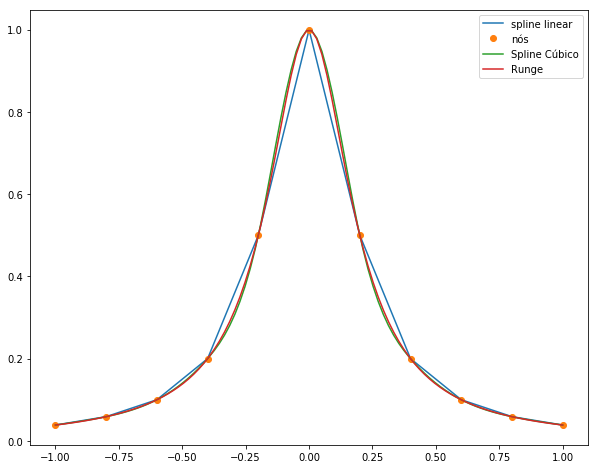

In [12]:
x=np.linspace(-1,1,11)
y=1./(1+25*x**2)

xx=np.linspace(-1.,1,100)
yy=1./(1+25*xx**2)

yl=NaturalSpline(x,y).SplineFunction(xx)
plt.figure(figsize=(10,8))
plt.plot(x,y,'-',label='spline linear')
plt.plot(x,y,'o',label='nós')
plt.plot(xx,yl,'-',label='Spline Cúbico')
plt.plot(xx,yy,'-',label='Runge')
plt.legend()
plt.show()
plt.clf()